In [1]:
# Importing libraries
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import tensorflow as tf

from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Importing and read the loan_approval_dataset.csv.
loan_approval_df = pd.read_csv('Resources/loan_approval_dataset.csv')
# loan_approval_df.head()

# Dropping "loan id" row
loan_approval_df = loan_approval_df.drop('loan_id', axis = 1)
loan_approval_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# Cheking for the columns names - issues defining X and y variables
loan_approval_df.keys()

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [4]:
# Seperate data: X = features and y = target variable
## Analysis/code obtained from class activity: 20-Supervised-Learning\2\Activities\08-Stu_Predicting_Bank_Customers
y = loan_approval_df[' loan_status']
X = loan_approval_df.drop(columns=' loan_status')
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [5]:
# Encoding the categorical variables using 'get_dummies'
X = pd.get_dummies(X)
X.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,1,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,1,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0,1


In [6]:
# Separating data into training and testing subsets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [7]:
# Using 'StandardScaler'
scaler = StandardScaler()

# Fitting data into the scaler
X_scaler = scaler.fit(X_train)

# Transforming the data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transforming the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)


In [8]:
# Instantiate the KNeighborsClassifier model with n_neighbors = 3 - cheking later for a different n_neighbors values
K_Neighbors = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training data
K_Neighbors.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
# Creating predictions using the testing data
y_predictions = K_Neighbors.predict(X_test_scaled)

In [10]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

    Approved       0.91      0.91      0.91       660
    Rejected       0.85      0.86      0.85       408

    accuracy                           0.89      1068
   macro avg       0.88      0.88      0.88      1068
weighted avg       0.89      0.89      0.89      1068



In [11]:
## Analysis/code obtained from class activity: 20-Supervised-Learning\2\Activities\\06-Stu_Predicting_Default

## Random Forest Model: 
# Creating random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=100, random_state=10)

# Fitting the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

In [12]:
# Making predictions using the random forest model:
predictions = rf_model.predict(X_test_scaled)

In [13]:
# Model evaluation: Evaluate model results:

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [14]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,650,10
Actual 1,10,398


Accuracy Score : 0.9812734082397003
Classification Report
              precision    recall  f1-score   support

    Approved       0.98      0.98      0.98       660
    Rejected       0.98      0.98      0.98       408

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



In [138]:
# Getting the feature importance array
importances = rf_model.feature_importances_

# List the top 5 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:15]

[(0.804187775308797, ' cibil_score'),
 (0.05488989556866576, ' loan_term'),
 (0.028911293901394956, ' loan_amount'),
 (0.02047096864406974, ' luxury_assets_value'),
 (0.01910773329460537, ' residential_assets_value'),
 (0.018818725008192816, ' income_annum'),
 (0.01880929139319192, ' commercial_assets_value'),
 (0.01757816998040275, ' bank_asset_value'),
 (0.008594076926884811, ' no_of_dependents'),
 (0.0022607909296224003, ' self_employed_ Yes'),
 (0.0022252919838315053, ' self_employed_ No'),
 (0.002165948235038804, ' education_ Graduate'),
 (0.001980038825302163, ' education_ Not Graduate')]

In [118]:
# Plotting data
## Relationship between income vs loan approval

## Max and min value of income annum 
max_val = loan_approval_df[' income_annum'].max()
# max_val = 9'900,000
min_val = loan_approval_df[' income_annum'].min()
# min_val = 200,000

under_500K = loan_approval_df[loan_approval_df[' income_annum'] < 500000].groupby([' loan_status'])[' loan_status'].count()
#under_500K
over_500k_under_5MM = loan_approval_df[(loan_approval_df[' income_annum'] > 500000) & (loan_approval_df[' income_annum'] < 5000000)].groupby([' loan_status'])[' loan_status'].count()
#over_500k_under_5MM
over_5MM = loan_approval_df[loan_approval_df[' income_annum'] > 5000000].groupby([' loan_status'])[' loan_status'].count()
#over_5MM

buckets = ["500k","500k-5MM","Over 5MM"]

final_dataframe = pd.DataFrame([under_500K, over_500k_under_5MM, over_5MM], index = buckets)
final_dataframe.head()



loan_status,Approved,Rejected
500k,86,42
500k-5MM,1191,718
over 5MM,1325,820


Text(0.5, 1.0, 'Income VS Loan Status')

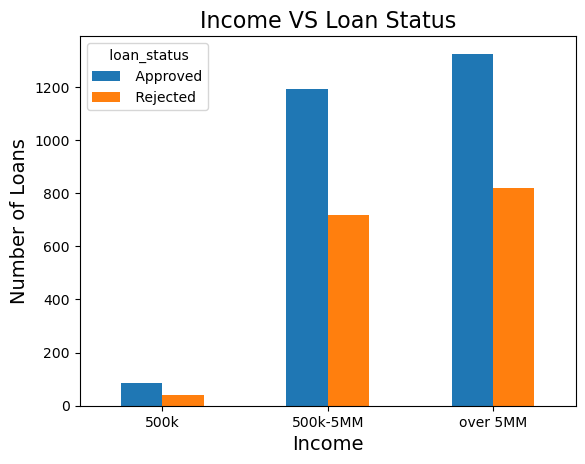

In [124]:
# Plotting data
## Relationship between income vs loan approval: Graph 

final_dataframe.plot.bar(rot = 0)
plt.ylabel('Number of Loans', fontsize=14)
plt.xlabel('Income', fontsize=14)
plt.title('Income VS Loan Status', fontsize=16)

In [134]:
# Plotting data:
## Relationship between loan amount and loan status

## Max and min value of income annum 
max_val = loan_approval_df[' loan_amount'].max()
# max_val = 39,500,000
min_val = loan_approval_df[' loan_amount'].min()
#min_val = 300,000

under_5MM = loan_approval_df[loan_approval_df[' loan_amount'] < 5000000].groupby([' loan_status'])[' loan_status'].count()
# under_5MM
over_5MM_under_15MM = loan_approval_df[(loan_approval_df[' loan_amount'] > 5000000) & (loan_approval_df[' loan_amount'] < 15000000)].groupby([' loan_status'])[' loan_status'].count()
# over_5MM_under_15MM
over_15MM_under_25MM = loan_approval_df[(loan_approval_df[' loan_amount'] > 15000000) & (loan_approval_df[' loan_amount'] < 25000000)].groupby([' loan_status'])[' loan_status'].count()
# over_15MM_under_25MM
over_25MM = loan_approval_df[loan_approval_df[' loan_amount'] > 25000000].groupby([' loan_status'])[' loan_status'].count()
# over_25MM

buckets1 = ["5MM","5MM-15MM", "15MM-25MM", "Over 25MM"]

final_dataframe1 = pd.DataFrame([under_5MM, over_5MM_under_15MM, over_15MM_under_25MM, over_25MM], index = buckets1)
final_dataframe1.head()


loan_status,Approved,Rejected
5MM,433,236
5MM-15MM,913,599
15MM-25MM,825,540
Over 25MM,454,225


Text(0.5, 1.0, 'Loan Amount VS Loan Status')

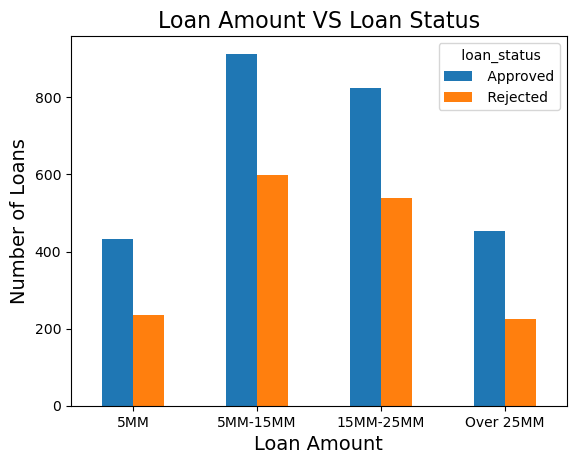

In [135]:
# Plotting data
## Relationship between loan amount and loan status: Graph 

final_dataframe1.plot.bar(rot = 0)
plt.ylabel('Number of Loans', fontsize=14)
plt.xlabel('Loan Amount', fontsize=14)
plt.title('Loan Amount VS Loan Status', fontsize=16)

In [149]:
# Plotting data:
## Relationship between Credit score and loan status

## Max and min value of income annum 
max_credit = loan_approval_df[' cibil_score'].max()
# max_credit = 900
min_credit = loan_approval_df[' cibil_score'].min()
min_credit = 300

under_400 = loan_approval_df[loan_approval_df[' cibil_score'] < 400].groupby([' loan_status'])[' loan_status'].count()
# under_400
over_400_under_500 = loan_approval_df[(loan_approval_df[' cibil_score'] > 400) & (loan_approval_df[' cibil_score'] < 500)].groupby([' loan_status'])[' loan_status'].count()
# over_400_under_500
over_500_under_600 = loan_approval_df[(loan_approval_df[' cibil_score'] > 500) & (loan_approval_df[' cibil_score'] < 600)].groupby([' loan_status'])[' loan_status'].count()
# over_500_under_600
over_600_under_700 = loan_approval_df[(loan_approval_df[' cibil_score'] > 600) & (loan_approval_df[' cibil_score'] < 700)].groupby([' loan_status'])[' loan_status'].count()
# over_600_under_700
over_700_under_800 = loan_approval_df[(loan_approval_df[' cibil_score'] > 700) & (loan_approval_df[' cibil_score'] < 800)].groupby([' loan_status'])[' loan_status'].count()
# over_700_under_800
over_800 = loan_approval_df[loan_approval_df[' cibil_score'] > 800].groupby([' loan_status'])[' loan_status'].count()
#over_800

buckets2 = ["400","400-500", "500-600", "600-700", "700-800", "Over 800"]

final_dataframe2 = pd.DataFrame([under_400, over_400_under_500, over_500_under_600, over_600_under_700, over_700_under_800, over_800], index = buckets2)
final_dataframe2.head()

loan_status,Approved,Rejected
400,72,632
400-500,76,612
500-600,381,346
600-700,691,4
700-800,726,4


Text(0.5, 1.0, 'Loan Amount VS Loan Status')

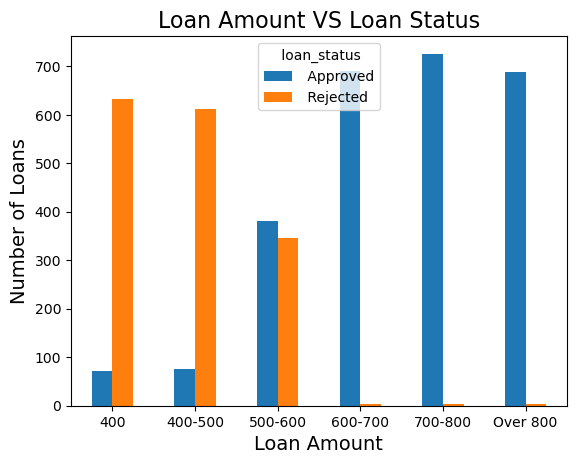

In [150]:
# Plotting data
## Relationship between loan amount and loan status: Graph 

final_dataframe2.plot.bar(rot = 0)
plt.ylabel('Number of Loans', fontsize=14)
plt.xlabel('Loan Amount', fontsize=14)
plt.title('Loan Amount VS Loan Status', fontsize=16)

In [98]:
## Relationship between loan amount and loan status

loan_under_300K = loan_approval_df[loan_approval_df[' loan_amount'] < 500000].groupby([' loan_status'])[' loan_status'].count()
loan_under_300K.head()

# under_fifty_thousand = loan_approval_df[loan_approval_df[' income_annum'] < 500000].groupby([' loan_status'])[' loan_status'].count()
# under_fifty_thousand.head()

# over_300k_under_800k = loan_approval_df[(loan_approval_df[' income_annum'] > 300000) & (loan_approval_df[' income_annum'] < 800000)].groupby([' loan_status'])[' loan_status'].count()
# over_800k = loan_approval_df[loan_approval_df[' income_annum'] > 800000].groupby([' loan_status'])[' loan_status'].count()
# plt.scatter(x_axis, under_300K, marker="o", facecolors="red", edgecolors="black",
#             s=x_axis, alpha=0.75)
# plt.show()
# buckets = ["300k","300-800","over 800"]

# final_dataframe = pd.DataFrame([under_300K,over_300k_under_800k,over_800k], index = buckets)
# final_dataframe['buckets'] = buckets
# final_dataframe.head()
# final_dataframe.plot.bar()
# plt.bar(, under_300K('Approved'), color='r', alpha=0.5, align="center")




 loan_status
 Approved    9
 Rejected    4
Name:  loan_status, dtype: int64